In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

dataframe = pd.read_csv("DataSet\data2.csv")

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Peluchex\AppData\Local\Temp\ipykernel_14764\1625035848.py:7: SyntaxWarning: invalid escape sequence '\d'
  dataframe = pd.read_csv("DataSet\data2.csv")
C:\Users\Peluchex\AppData\Local\Temp\ipykernel_14764\1625035848.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("DataSet\data2.csv")


## Investigación y preparación de los datos

In [2]:
dataframe.shape

(698672, 28)

In [3]:
dataframe.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698672 entries, 0 to 698671
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           698672 non-null  object 
 1   Date Rptd       698668 non-null  object 
 2   DATE OCC        698668 non-null  object 
 3   TIME OCC        698667 non-null  float64
 4   AREA            698667 non-null  float64
 5   AREA NAME       698667 non-null  object 
 6   Rpt Dist No     698667 non-null  float64
 7   Part 1-2        698667 non-null  float64
 8   Crm Cd          698667 non-null  float64
 9   Crm Cd Desc     698667 non-null  object 
 10  Mocodes         602604 non-null  object 
 11  Vict Age        698667 non-null  float64
 12  Vict Sex        607450 non-null  object 
 13  Vict Descent    607446 non-null  object 
 14  Premis Cd       698658 non-null  float64
 15  Premis Desc     698301 non-null  object 
 16  Weapon Used Cd  242948 non-null  float64
 17  Weapon Des

In [5]:
dataframe.isnull().sum()

DR_NO                  0
Date Rptd              4
DATE OCC               4
TIME OCC               5
AREA                   5
AREA NAME              5
Rpt Dist No            5
Part 1-2               5
Crm Cd                 5
Crm Cd Desc            5
Mocodes            96068
Vict Age               5
Vict Sex           91222
Vict Descent       91226
Premis Cd             14
Premis Desc          371
Weapon Used Cd    455724
Weapon Desc       455724
Status                 5
Status Desc            5
Crm Cd 1              13
Crm Cd 2          646519
Crm Cd 3          696903
Crm Cd 4          698623
LOCATION               5
Cross Street      585377
LAT                    5
LON                    5
dtype: int64

Resulta sospechoso que varias columnas tengan la misma cantidad de nulos (5), revisamos si puede ser un error en el archivo.

In [6]:
dataframe_null = dataframe[dataframe['Vict Age'].isnull()]
dataframe_null


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
698667,230715091,09/26/2023 12:00:00 AM,09/18/2023 12:00:0{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698668,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698669,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698670,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698671,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se filtran las filas que poseen nulos y observamos que son las mismas filas. Se entiende que hubo un error mientras se registraba el caso 230715091 lo que genero filas sin datos.

In [7]:
# Eliminamos las filas que contenian los datos con error o nulos.
dataframe.drop([698667, 698668, 698669, 698670, 698671], axis = 0, inplace = True)
dataframe.shape

(698667, 28)

In [8]:
dataframe

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130.0,7.0,Wilshire,784.0,1.0,510.0,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800.0,1.0,Central,182.0,1.0,330.0,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700.0,3.0,Southwest,356.0,1.0,480.0,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037.0,9.0,Van Nuys,964.0,1.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200.0,6.0,Hollywood,666.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698662,230810349,05/31/2023 12:00:00 AM,05/25/2023 12:00:00 AM,800.0,8.0,West LA,834.0,2.0,956.0,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",...,AO,Adult Other,956.0,NaN,NaN,NaN,10600 OHIO AV,NaN,34.0579,-118.4322
698663,230608595,04/17/2023 12:00:00 AM,04/14/2023 12:00:00 AM,2030.0,6.0,Hollywood,645.0,2.0,626.0,INTIMATE PARTNER - SIMPLE ASSAULT,...,IC,Invest Cont,626.0,NaN,NaN,NaN,1300 N ORANGE DR,NaN,34.0943,-118.3415
698664,231512560,07/22/2023 12:00:00 AM,07/16/2023 12:00:00 AM,823.0,15.0,N Hollywood,1546.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,11600 RIVERSIDE DR,NaN,34.1629,-118.3848
698665,230209518,04/24/2023 12:00:00 AM,04/09/2023 12:00:00 AM,1.0,2.0,Rampart,233.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,100 N BENTON WY,NaN,34.0699,-118.2777


In [9]:
dataframe.describe()

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,698667.000000,698667.000000,698667.000000,698667.000000,698667.000000,698667.000000,698658.000000,242948.000000,698659.000000,52153.000000,1769.000000,49.000000,698667.000000,698667.000000
mean,1334.472825,10.722788,1118.660461,1.416985,501.246567,29.949511,305.420253,362.564001,500.985708,956.119418,983.819107,990.163265,33.963516,-117.971348
std,654.221913,6.090015,608.995330,0.493061,208.124380,21.712702,216.573695,123.627487,207.914272,112.844359,52.004591,30.066833,1.937983,6.721274
min,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429700
50%,1411.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321900
75%,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163600,-118.273900
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


TIME: La columna que determina la hora en que sucedió el crimen, se entiende que está formateada en hora militar (0001 a 2359).

AREA: Área geográfica en la que suceden los hechos, se dividen en 21 sectores.

Crm Cd: Códigos de los crímenes reportados, se numeran de 110 a 956. En otra columna se encuentra la descripción.

Vict Age: La edad de las víctimas, de -4 a 120 años. Podemos Deducir que por los nros negativos hay error en el ingreso de datos.

Weapon Used Cd: Código de arma utilizada en el crimen. De 698.667 registros solo 242.948 poseen el código (34% aprox).

In [10]:
dataframe['Vict Age'].value_counts()

Vict Age
 0.0      169689
 30.0      16025
 35.0      15621
 29.0      15297
 31.0      15249
           ...  
 97.0         47
-2.0          25
-3.0           4
-4.0           3
 120.0         1
Name: count, Length: 104, dtype: int64

Se ve que más de un 20% de datos no poseen edad (<=0), procedemos a remplazar los datos por nan para obtener el promedio correcto de las edades de las víctimas.

In [11]:
# Eliminamos de la columna "edad victima" todas las edades que sean menores a cero y también 120 ya que sería un caso demasiado raro.
dataframe['Vict Age'].replace([0, -1, -2, -3, -4, 120], np.nan, inplace = True)
dataframe['Vict Age'].describe()

count    528854.00000
mean         39.56627
std          15.56565
min           2.00000
25%          28.00000
50%          37.00000
75%          50.00000
max          99.00000
Name: Vict Age, dtype: float64

Vemos que la edad promedio de las victimas es de casi 40 años.

In [12]:
# Formateamos las columnas que son datetime.
dataframe['Date Rptd'] = pd.to_datetime(dataframe['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
#dataframe['Date Rptd'] = dataframe['Date Rptd'].dt.strftime('%d/%m/%Y')

dataframe['DATE OCC'] = pd.to_datetime(dataframe['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
#dataframe['DATE OCC'] = dataframe['DATE OCC'].dt.strftime('%d/%m/%Y')

In [13]:
# Tomamos la hora militar y la convertimos a hora tradicional. Ej. 1 deberia ser igual a 00:01hs
dataframe['TIME OCC'] = dataframe['TIME OCC'].astype(int).astype(str).str.zfill(4)
dataframe['TIME OCC'] = dataframe['TIME OCC'].apply(lambda x: f"{x[:2]}:{x[2:]} hs")

## Muestra grafica de datos más relevantes

In [14]:
df_edad = dataframe[dataframe['Vict Age'].notna()]

df_sexo = dataframe['Vict Sex'].value_counts()

df_descendencia = dataframe[dataframe['Vict Descent'].notna()]

df_crimenes = dataframe['Crm Cd Desc'].value_counts()

df_crimenes_dia = dataframe['DATE OCC'].dt.day_of_week.value_counts().sort_index()
df_crimenes_diario = dataframe['DATE OCC'].dt.day.value_counts().sort_index()
df_crimenes_mensual = dataframe['DATE OCC'].dt.month.value_counts().sort_index()
df_crimenes_anual = dataframe['DATE OCC'].dt.year.value_counts().sort_index()

df_areas = dataframe['AREA NAME'].value_counts()

(0.0, 100.0)

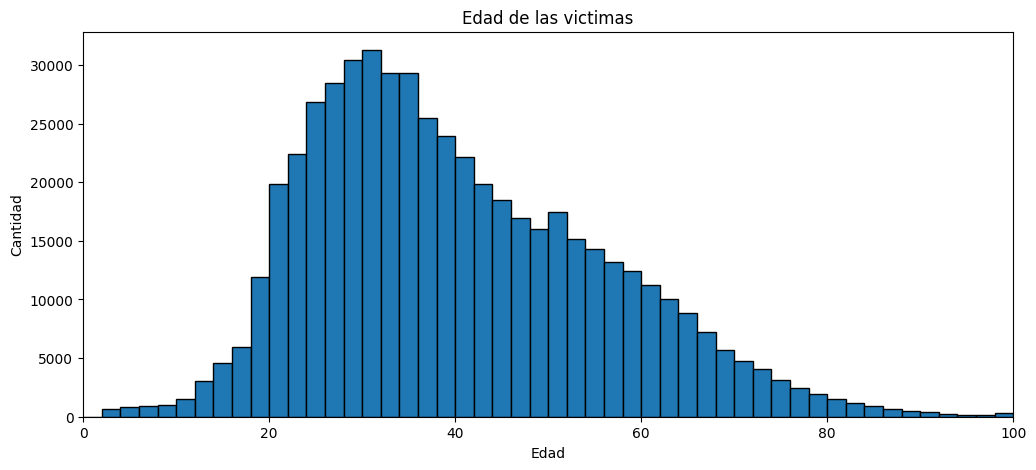

In [15]:
plt.figure(figsize = (12, 5))

plt.hist(df_edad['Vict Age'], bins=np.arange(0, 101, 2), edgecolor = 'k')
plt.title("Edad de las victimas")
plt.xlabel("Edad")
plt.ylabel("Cantidad")

plt.xlim(0, 100)

se observa un crecimiento importante en la edad de las víctimas, de 16 a 32 años avanzando rápidamente. Luego un decrecimiento casi progresivo.

Text(0.5, 1.0, 'Genero de las victimas')

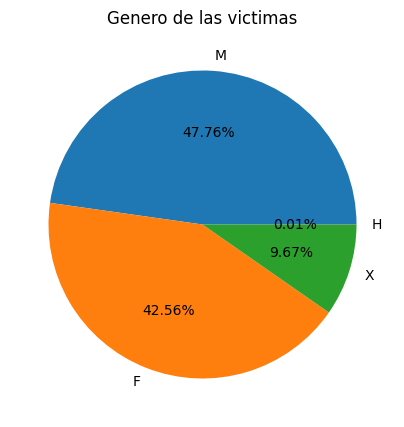

In [16]:
plt.figure(figsize = (5, 5))

plt.pie(df_sexo, labels = df_sexo.index, autopct = '%1.2f%%')
plt.title("Genero de las victimas")


Se observan 3 grupos predominante, donde "desconocido" ocupa el 3er lugar. Entre hombres y mujeres no se observa una diferencia significativa.

Text(0, 0.5, 'Cantidad')

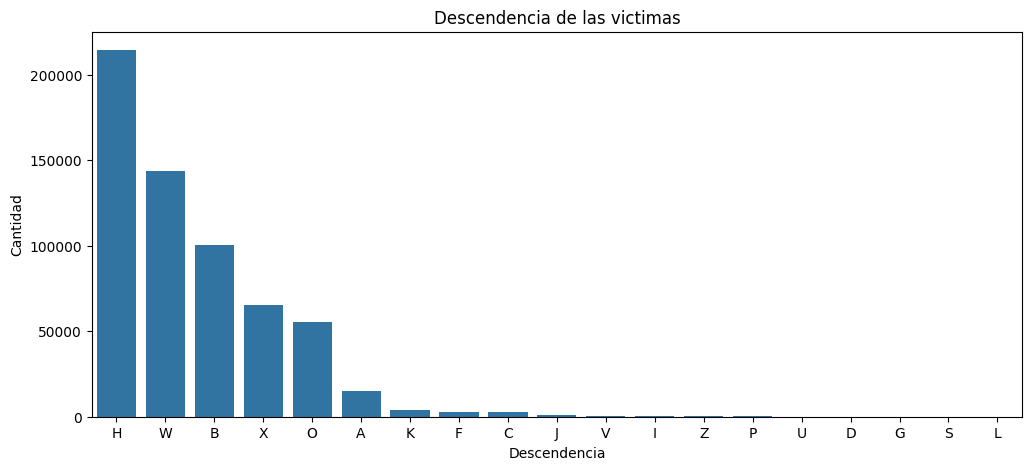

In [17]:
plt.figure(figsize = (12, 5))

sns.countplot(data = df_descendencia, x = 'Vict Descent', order = df_descendencia['Vict Descent'].value_counts().index)
plt.title('Descendencia de las victimas')
plt.xlabel('Descendencia')
plt.ylabel('Cantidad')


Vemos que la mayoría de víctimas son descendientes de hispanos, seguidos por blancos, negros, otros y asiáticos. Se observa una clara diferencia entre los 5 grupos nombrados y el resto de las etnias.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'VEHICLE - STOLEN'),
  Text(1, 0, 'BATTERY - SIMPLE ASSAULT'),
  Text(2, 0, 'THEFT OF IDENTITY'),
  Text(3, 0, 'BURGLARY FROM VEHICLE'),
  Text(4, 0, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'),
  Text(5, 0, 'BURGLARY'),
  Text(6, 0, 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'),
  Text(7, 0, 'THEFT PLAIN - PETTY ($950 & UNDER)'),
  Text(8, 0, 'INTIMATE PARTNER - SIMPLE ASSAULT'),
  Text(9, 0, 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)')])

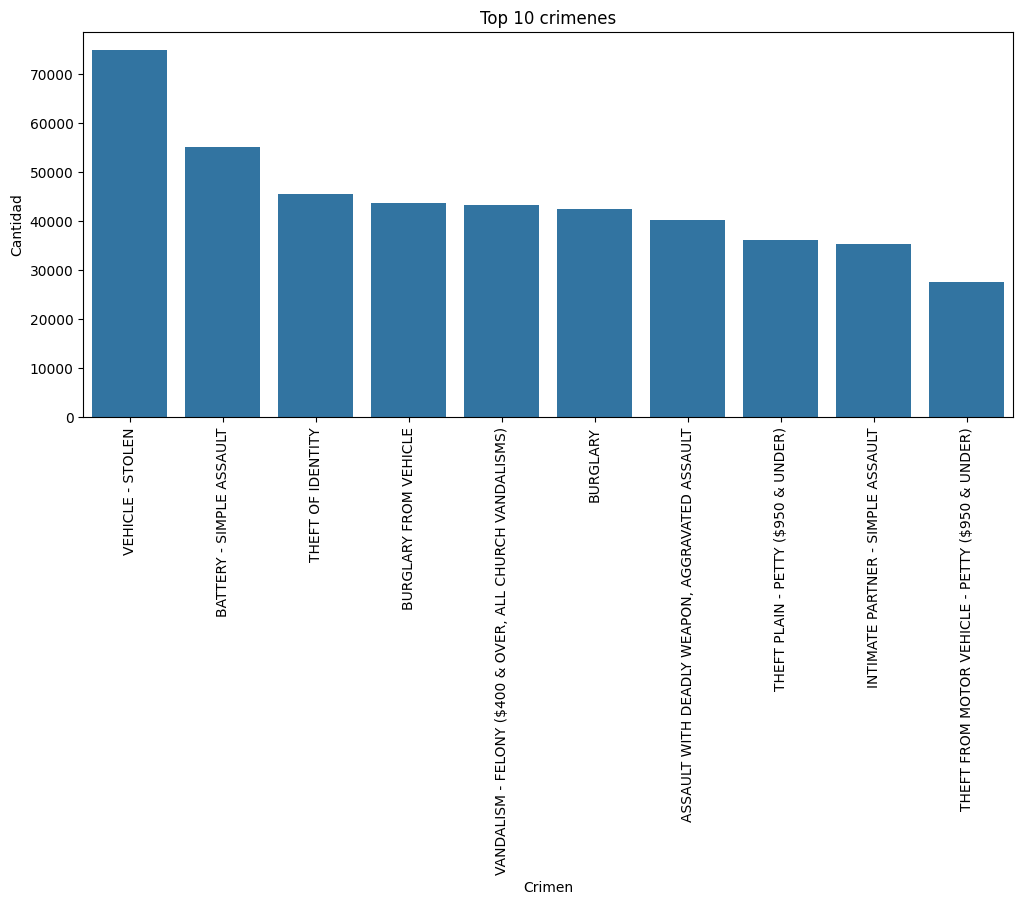

In [18]:
plt.figure(figsize = (12, 5))

sns.barplot(y = df_crimenes.head(10).values, x = df_crimenes.head(10).index)
plt.title("Top 10 crimenes")
plt.xlabel("Crimen")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)

Text(0, 0.5, 'Crimenes')

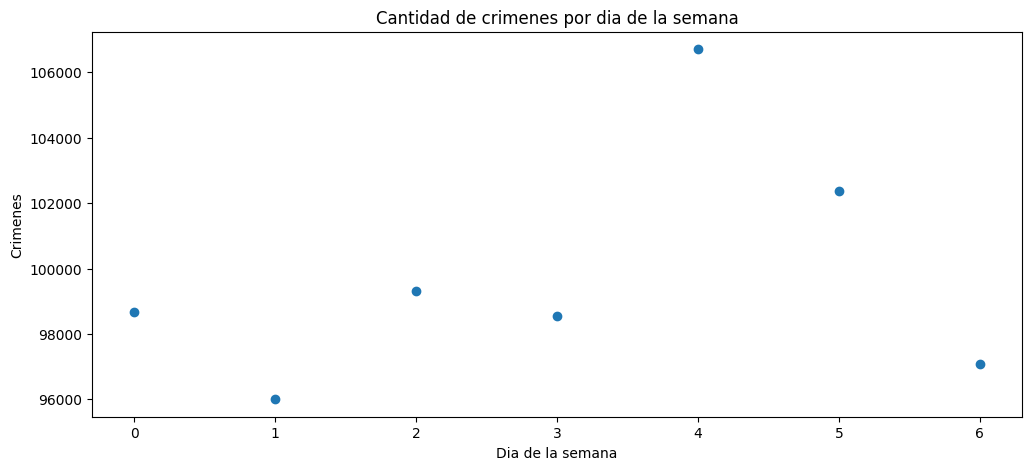

In [19]:
plt.figure(figsize = (12, 5))

plt.plot(df_crimenes_dia.index, df_crimenes_dia.values, 'o')
plt.title("Cantidad de crimenes por dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Crimenes")

Se marca el Viernes como el día en que ocurren mas delitos.

Text(0, 0.5, 'Crimenes')

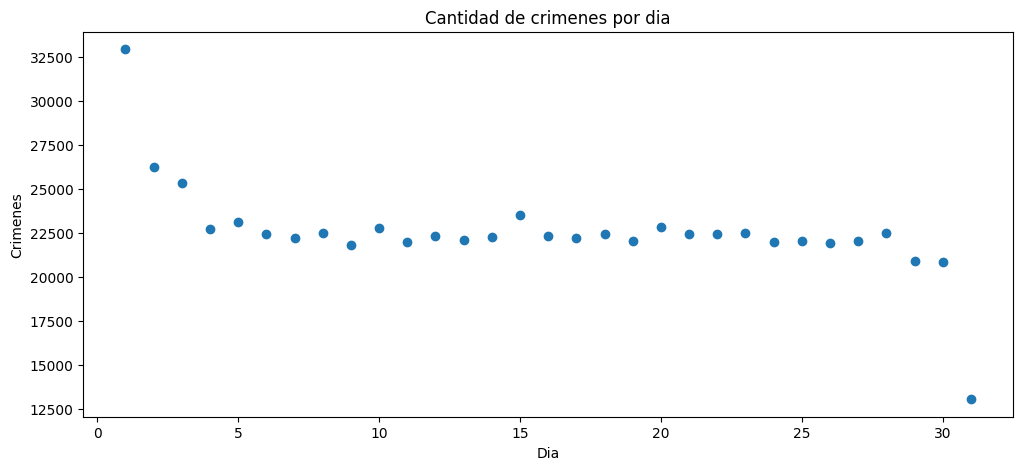

In [20]:
plt.figure(figsize = (12, 5))

plt.plot(df_crimenes_diario.index, df_crimenes_diario.values, 'o')
plt.title("Cantidad de crimenes por dia")
plt.xlabel("Dia")
plt.ylabel("Crimenes")

Se marcan los primeros dias del mes, como la epoca con más delitos.

Text(0, 0.5, 'Crimenes')

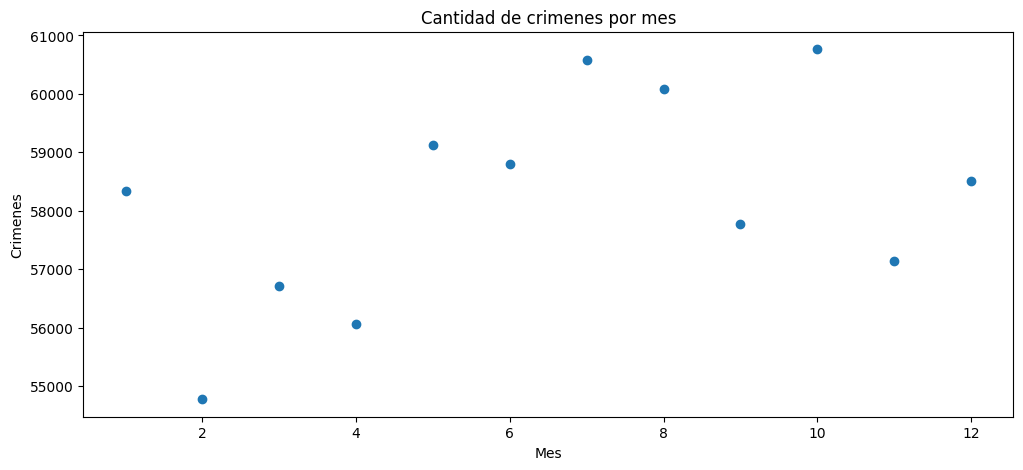

In [21]:
plt.figure(figsize = (12, 5))

plt.plot(df_crimenes_mensual.index, df_crimenes_mensual.values, 'o')
plt.title("Cantidad de crimenes por mes")
plt.xlabel("Mes")
plt.ylabel("Crimenes")

Observamos una franja promedio y ciertos meses donde los delitos disminuyen o aumentan drasticamente. Febrero como mes con menos crimenes. Octubre como el mes con mas crimenes.

Text(0, 0.5, 'Crimenes')

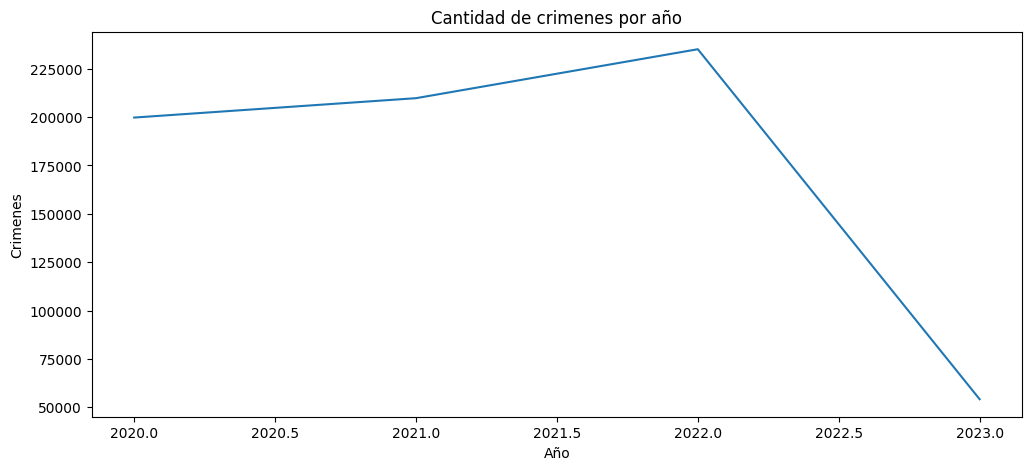

In [22]:
plt.figure(figsize = (12, 5))

plt.plot(df_crimenes_anual.index, df_crimenes_anual.values)
plt.title("Cantidad de crimenes por año")
plt.xlabel("Año")
plt.ylabel("Crimenes")

Se obserba un crecimiento mantenido de los crimenes desde 2020 a 2022 y luego una caida abrupta, se deberia constatar que la base de datos posea todos los registros o si hubo algun cambio que haya afectado el comportamiento de los denuncuantes o delincuentes.

C:\Users\Peluchex\AppData\Local\Temp\ipykernel_14764\2955980989.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, ha='right')
C:\Users\Peluchex\AppData\Local\Temp\ipykernel_14764\2955980989.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, ha='right')


[Text(0, 0, 'Topanga'),
 Text(1, 0, 'Devonshire'),
 Text(2, 0, 'Mission'),
 Text(3, 0, 'Hollenbeck'),
 Text(4, 0, 'Foothill')]

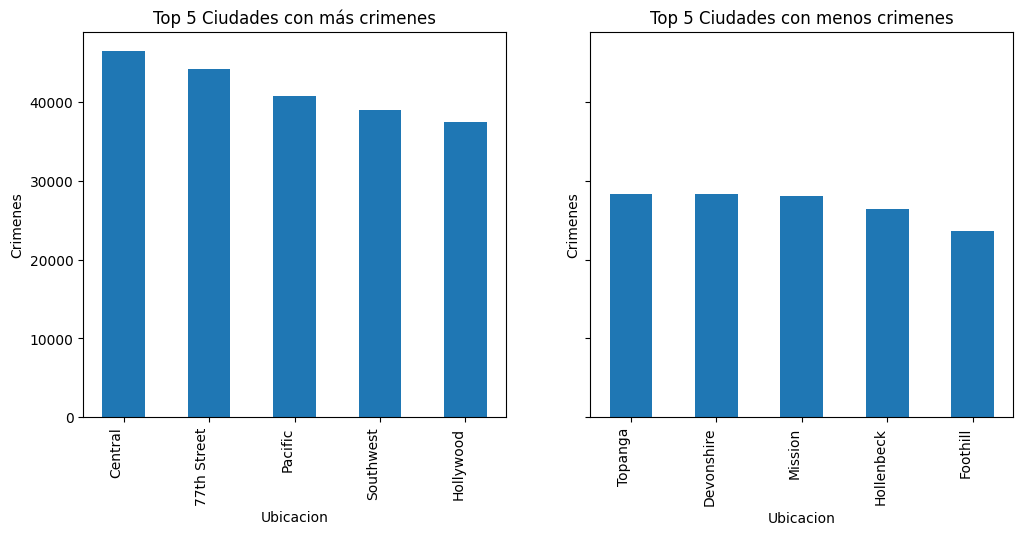

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey = True)

axs[0].bar(df_areas.head(5).index, df_areas.head(5).values, width=0.5)
axs[0].set_xlabel('Ubicacion')
axs[0].set_ylabel('Crimenes')
axs[0].set_title('Top 5 Ciudades con más crimenes')

axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, ha='right')

axs[1].bar(df_areas.tail(5).index, df_areas.tail(5).values, width=0.5)
axs[1].set_xlabel('Ubicacion')
axs[1].set_ylabel('Crimenes')
axs[1].set_title('Top 5 Ciudades con menos crimenes')

axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, ha='right')

## Para este análisis en particular, vamos a cruzar datos de género, ascendencia y estado del caso para determinar si existe algún sesgo en las resoluciones de los casos.

In [24]:
# Filtramos los daots que considereamos interesantes para el analisis.
df_analisis = dataframe[['AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Status Desc']]
df_analisis = df_analisis.dropna()

In [25]:
df_analisis['Vict Sex'].unique()

array(['M', 'X', 'F', 'H'], dtype=object)

In [26]:
# Creamos un filtro para poder analizar los estados de los crimenes por genero. FEMALE = FEMENINO
df_analisis_f = df_analisis[df_analisis['Vict Sex'] == 'F']
# Agrupamos por el genero filtrado y el estado de los casos.
df_analisis_f = df_analisis_f.groupby(['Vict Sex', 'Status Desc']).size().reset_index(name='count')
# Contamos la cantidad de datos agrupados.
total_cases = df_analisis_f['count'].sum()
# Realizamos un porcentaje del total. Puede que nos sea de ayuda.
df_analisis_f['percentage'] = df_analisis_f['count'] / total_cases * 100

# Creamos un filtro para poder analizar los estados de los crimenes por genero. H = OTRO
df_analisis_h = df_analisis[df_analisis['Vict Sex'] == 'H']
df_analisis_h = df_analisis_h.groupby(['Vict Sex', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_h['count'].sum()
df_analisis_h['percentage'] = df_analisis_h['count'] / total_cases * 100

# Creamos un filtro para poder analizar los estados de los crimenes por genero. MALE = MASCULINO
df_analisis_m = df_analisis[df_analisis['Vict Sex'] == 'M']
df_analisis_m = df_analisis_m.groupby(['Vict Sex', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_m['count'].sum()
df_analisis_m['percentage'] = df_analisis_m['count'] / total_cases * 100

# Creamos un filtro para poder analizar los estados de los crimenes por genero. X = DESCONOCIDO
df_analisis_x = df_analisis[df_analisis['Vict Sex'] == 'X']
df_analisis_x = df_analisis_x.groupby(['Vict Sex', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_x['count'].sum()
df_analisis_x['percentage'] = df_analisis_x['count'] / total_cases * 100

Text(0.5, 1.0, 'Estado de casos sexo: desconocido')

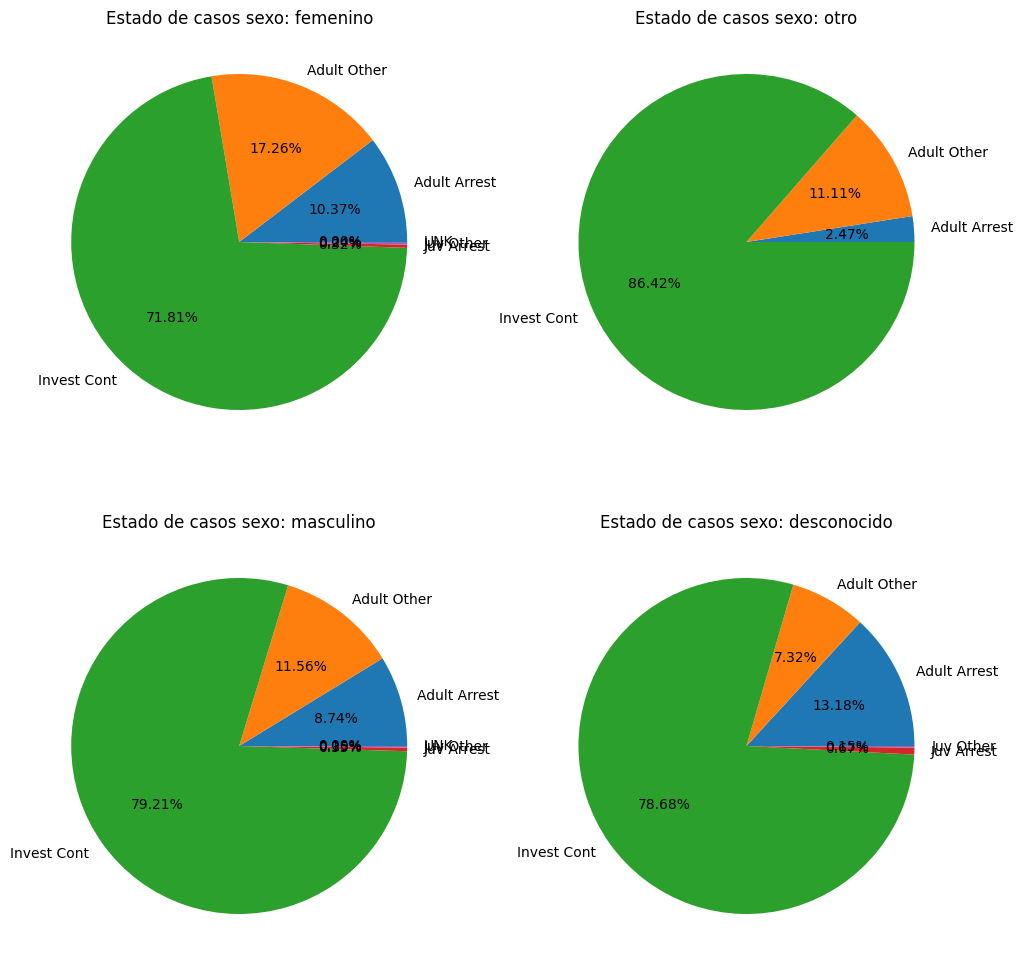

In [27]:
fig, axs = plt.subplots(2,2, figsize=(12, 12))

axs[0,0].pie(df_analisis_f['count'], labels=df_analisis_f['Status Desc'], autopct='%1.2f%%')
axs[0,0].set_title('Estado de casos sexo: femenino')

axs[0,1].pie(df_analisis_h['count'], labels=df_analisis_h['Status Desc'], autopct='%1.2f%%')
axs[0,1].set_title('Estado de casos sexo: otro')

axs[1,0].pie(df_analisis_m['count'], labels=df_analisis_m['Status Desc'], autopct='%1.2f%%')
axs[1,0].set_title('Estado de casos sexo: masculino')

axs[1,1].pie(df_analisis_x['count'], labels=df_analisis_x['Status Desc'], autopct='%1.2f%%')
axs[1,1].set_title('Estado de casos sexo: desconocido')


Si las victimas son mujeres, observamos mas casos resueltos pero un aumento de adultos "no arrestados"

In [28]:
df_analisis['Vict Descent'].value_counts()

Vict Descent
H    211001
W    133782
B     99373
O     46646
A     14988
X     10770
K      3717
F      2869
C      2577
J       937
V       699
I       656
Z       339
P       189
U       106
D        52
G        50
L        39
S        35
Name: count, dtype: int64

Al ser tantos datos, solo tomaremos las 10 descendencias con mas victimas.

In [29]:
df_analisis_Dsc_h = df_analisis[df_analisis['Vict Descent'] == 'H']
df_analisis_Dsc_h = df_analisis_Dsc_h.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_h['count'].sum()
df_analisis_Dsc_h['percentage'] = df_analisis_Dsc_h['count'] / total_cases * 100

df_analisis_Dsc_w = df_analisis[df_analisis['Vict Descent'] == 'W']
df_analisis_Dsc_w = df_analisis_Dsc_w.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_w['count'].sum()
df_analisis_Dsc_w['percentage'] = df_analisis_Dsc_w['count'] / total_cases * 100

df_analisis_Dsc_b = df_analisis[df_analisis['Vict Descent'] == 'B']
df_analisis_Dsc_b = df_analisis_Dsc_b.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_b['count'].sum()
df_analisis_Dsc_b['percentage'] = df_analisis_Dsc_b['count'] / total_cases * 100

df_analisis_Dsc_o = df_analisis[df_analisis['Vict Descent'] == 'O']
df_analisis_Dsc_o = df_analisis_Dsc_o.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_o['count'].sum()
df_analisis_Dsc_o['percentage'] = df_analisis_Dsc_o['count'] / total_cases * 100

df_analisis_Dsc_a = df_analisis[df_analisis['Vict Descent'] == 'A']
df_analisis_Dsc_a = df_analisis_Dsc_a.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_a['count'].sum()
df_analisis_Dsc_a['percentage'] = df_analisis_Dsc_a['count'] / total_cases * 100

df_analisis_Dsc_x = df_analisis[df_analisis['Vict Descent'] == 'X']
df_analisis_Dsc_x = df_analisis_Dsc_x.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_x['count'].sum()
df_analisis_Dsc_x['percentage'] = df_analisis_Dsc_x['count'] / total_cases * 100

df_analisis_Dsc_k = df_analisis[df_analisis['Vict Descent'] == 'K']
df_analisis_Dsc_k = df_analisis_Dsc_k.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_k['count'].sum()
df_analisis_Dsc_k['percentage'] = df_analisis_Dsc_k['count'] / total_cases * 100

df_analisis_Dsc_f = df_analisis[df_analisis['Vict Descent'] == 'F']
df_analisis_Dsc_f = df_analisis_Dsc_f.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_f['count'].sum()
df_analisis_Dsc_f['percentage'] = df_analisis_Dsc_f['count'] / total_cases * 100

df_analisis_Dsc_c = df_analisis[df_analisis['Vict Descent'] == 'C']
df_analisis_Dsc_c = df_analisis_Dsc_c.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_c['count'].sum()
df_analisis_Dsc_c['percentage'] = df_analisis_Dsc_c['count'] / total_cases * 100

df_analisis_Dsc_j = df_analisis[df_analisis['Vict Descent'] == 'J']
df_analisis_Dsc_j = df_analisis_Dsc_j.groupby(['Vict Descent', 'Status Desc']).size().reset_index(name='count')
total_cases = df_analisis_Dsc_j['count'].sum()
df_analisis_Dsc_j['percentage'] = df_analisis_Dsc_j['count'] / total_cases * 100


Text(0.5, 1.0, 'Estado de casos descendencia: japones')

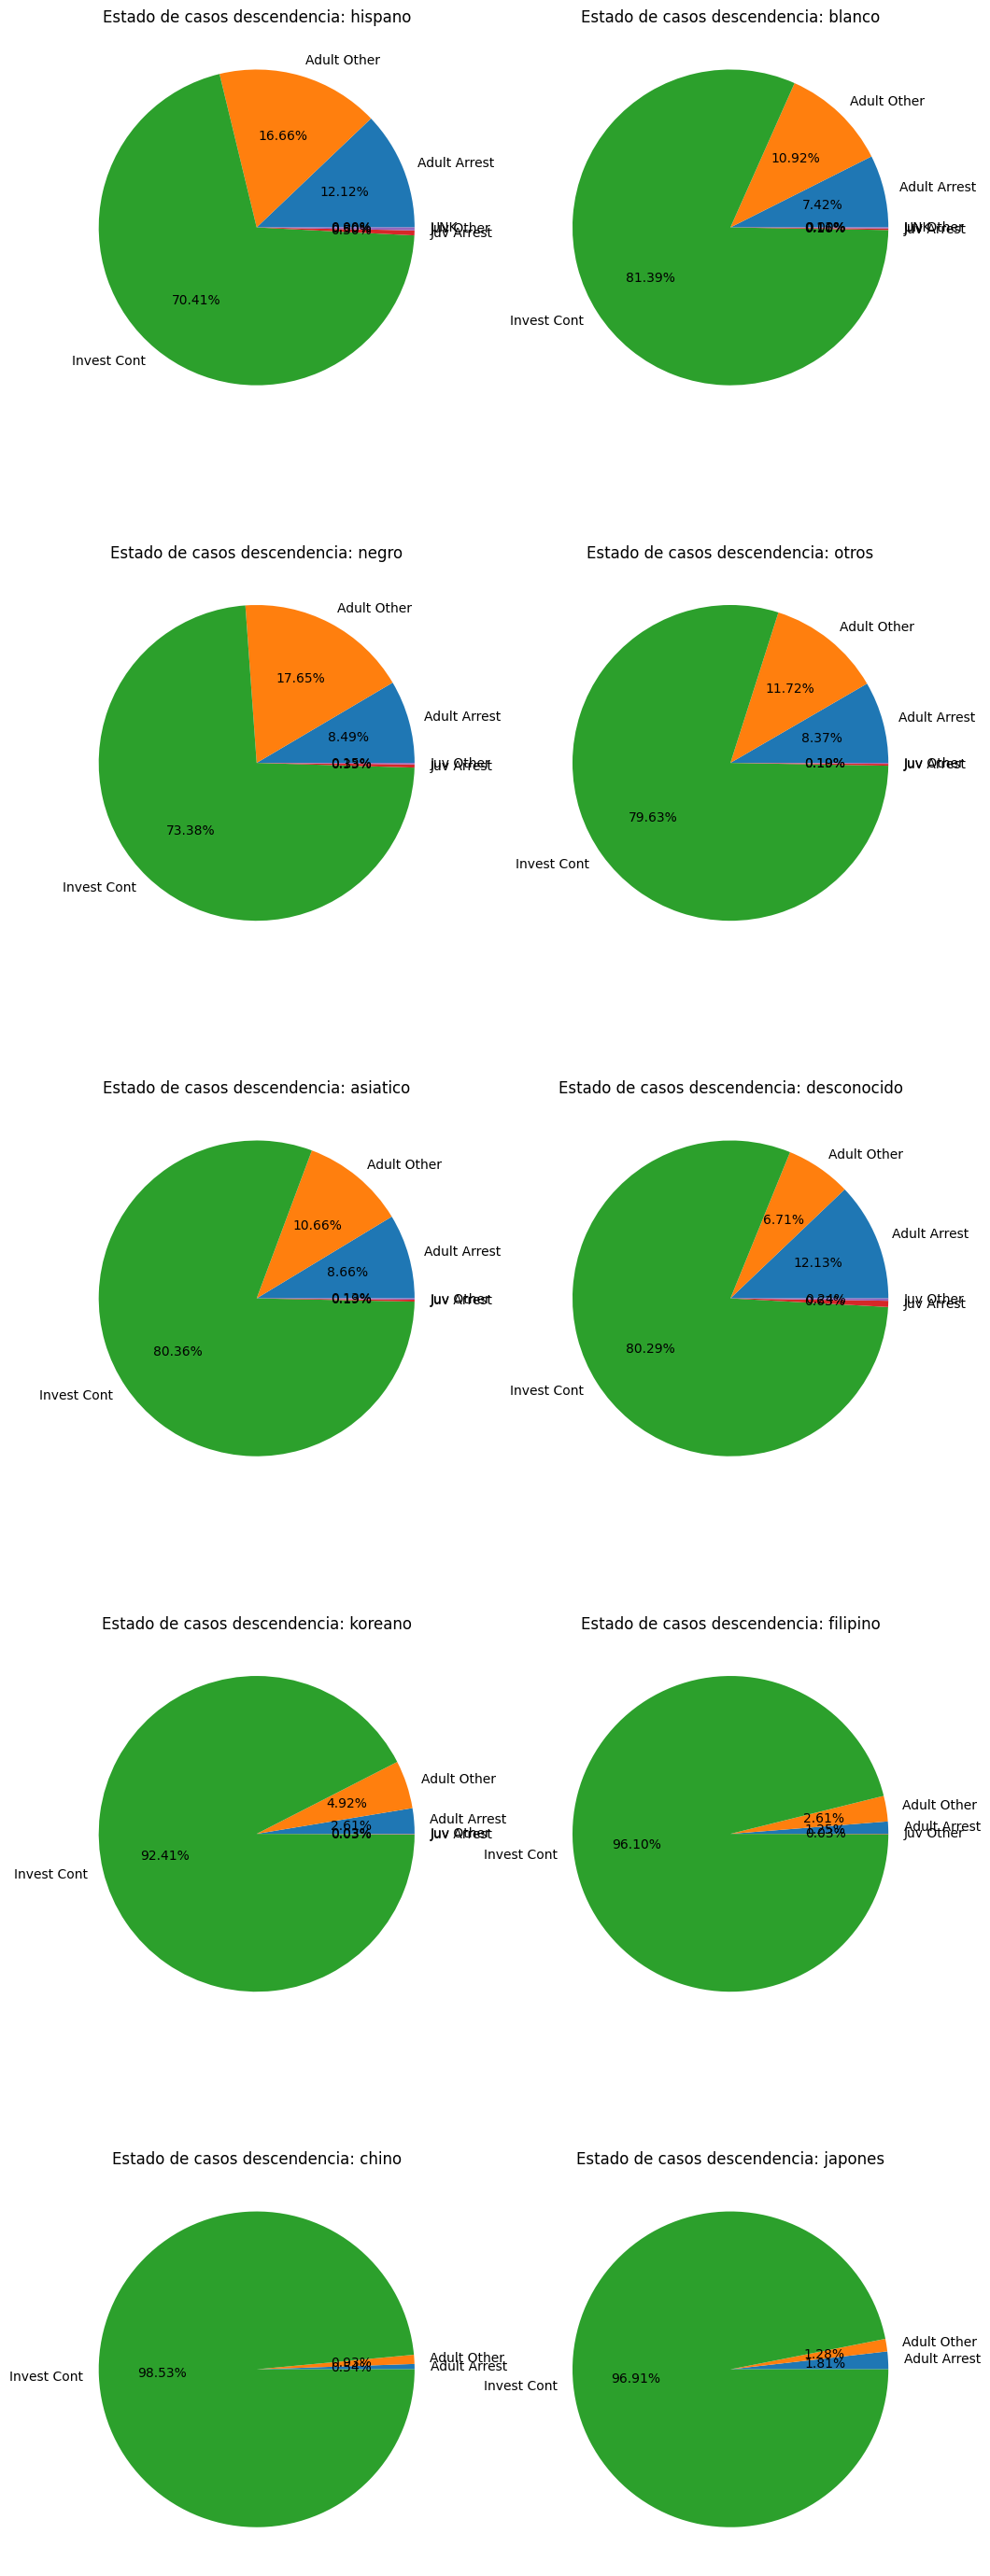

In [30]:
fig, axs = plt.subplots(5,2, figsize=(12, 36))

axs[0,0].pie(df_analisis_Dsc_h['count'], labels=df_analisis_Dsc_h['Status Desc'], autopct='%1.2f%%')
axs[0,0].set_title('Estado de casos descendencia: hispano')

axs[0,1].pie(df_analisis_Dsc_w['count'], labels=df_analisis_Dsc_w['Status Desc'], autopct='%1.2f%%')
axs[0,1].set_title('Estado de casos descendencia: blanco')

axs[1,0].pie(df_analisis_Dsc_b['count'], labels=df_analisis_Dsc_b['Status Desc'], autopct='%1.2f%%')
axs[1,0].set_title('Estado de casos descendencia: negro')

axs[1,1].pie(df_analisis_Dsc_o['count'], labels=df_analisis_Dsc_o['Status Desc'], autopct='%1.2f%%')
axs[1,1].set_title('Estado de casos descendencia: otros')

axs[2,0].pie(df_analisis_Dsc_a['count'], labels=df_analisis_Dsc_a['Status Desc'], autopct='%1.2f%%')
axs[2,0].set_title('Estado de casos descendencia: asiatico')

axs[2,1].pie(df_analisis_Dsc_x['count'], labels=df_analisis_Dsc_x['Status Desc'], autopct='%1.2f%%')
axs[2,1].set_title('Estado de casos descendencia: desconocido')

axs[3,0].pie(df_analisis_Dsc_k['count'], labels=df_analisis_Dsc_k['Status Desc'], autopct='%1.2f%%')
axs[3,0].set_title('Estado de casos descendencia: koreano')

axs[3,1].pie(df_analisis_Dsc_f['count'], labels=df_analisis_Dsc_f['Status Desc'], autopct='%1.2f%%')
axs[3,1].set_title('Estado de casos descendencia: filipino')

axs[4,0].pie(df_analisis_Dsc_c['count'], labels=df_analisis_Dsc_c['Status Desc'], autopct='%1.2f%%')
axs[4,0].set_title('Estado de casos descendencia: chino')

axs[4,1].pie(df_analisis_Dsc_j['count'], labels=df_analisis_Dsc_j['Status Desc'], autopct='%1.2f%%')
axs[4,1].set_title('Estado de casos descendencia: japones')

Se observan pequeñas diferencias que no consideraria causa de sesgo sino mas bien por la diferencia numerica de casos. Se podria decir que a medida que los casos aumentan, se cierran mas investigaciones.
